In [1]:
from google.colab import files
files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'index,age,sex,bmi,children,smoker,region,charges\n0,19,female,27.9,0,yes,southwest,16884.924\n1,18,male,33.77,1,no,southeast,1725.5523\n2,28,male,33.0,3,no,southeast,4449.462\n3,33,male,22.705,0,no,northwest,21984.47061\n4,32,male,28.88,0,no,northwest,3866.8552\n5,31,female,25.74,0,no,southeast,3756.6216\n6,46,female,33.44,1,no,southeast,8240.5896\n7,37,female,27.74,3,no,northwest,7281.5056\n8,37,male,29.83,2,no,northeast,6406.4107\n9,60,female,25.84,0,no,northwest,28923.13692\n10,25,male,26.22,0,no,northeast,2721.3208\n11,62,female,26.29,0,yes,southeast,27808.7251\n12,23,male,34.4,0,no,southwest,1826.843\n13,56,female,39.82,0,no,southeast,11090.7178\n14,27,male,42.13,0,yes,southeast,39611.7577\n15,19,male,24.6,1,no,southwest,1837.237\n16,52,female,30.78,1,no,northeast,10797.3362\n17,23,male,23.845,0,no,northeast,2395.17155\n18,56,male,40.3,0,no,southwest,10602.385\n19,30,male,35.3,0,yes,southwest,36837.467\n20,60,female,36.005,0,no,northeast,13228.84695\n21,30,fema

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns

# Load the data

In [3]:
data = pd.read_csv("insurance.csv")
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.drop('index', axis=1, inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Pre-processing of the data

In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the data.

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
print("Column :    unique values")
for column in data.columns:
  print(f"{column}:     {data[column].nunique()}")

Column :    unique values
age:     47
sex:     2
bmi:     548
children:     6
smoker:     2
region:     4
charges:     1337


In [10]:
for column in data.columns:
  if data[column].nunique() < 10:
    data[column] = data[column].astype('category')

len(data.select_dtypes(include=['category']).columns)


4

There are 4 categorical variavles in the dataset.

In [11]:
data.dtypes


age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

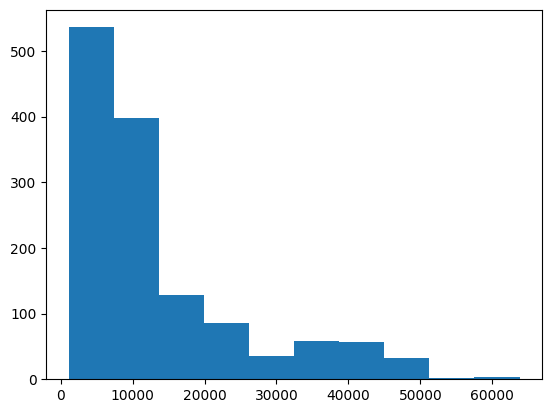

In [12]:
plt.figure()
plt.hist(data['charges'])
plt.show()

Target variable is right-skewed.

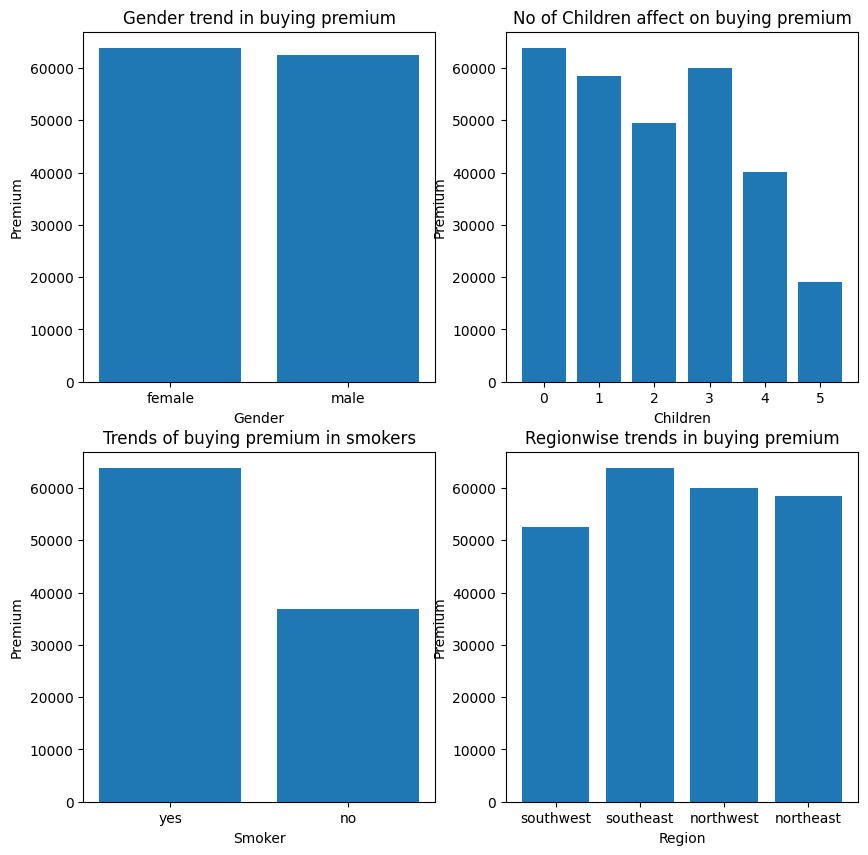

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].bar(data['sex'], data['charges'])
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Premium")
axes[0, 0].set_title("Gender trend in buying premium")
axes[0, 1].bar(data['children'], data['charges'])
axes[0, 1].set_xlabel("Children")
axes[0, 1].set_ylabel("Premium")
axes[0, 1].set_title("No of Children affect on buying premium")
axes[1, 0].bar(data['smoker'], data['charges'])
axes[1, 0].set_xlabel("Smoker")
axes[1, 0].set_ylabel("Premium")
axes[1, 0].set_title("Trends of buying premium in smokers")
axes[1, 1].bar(data['region'], data['charges'])
axes[1, 1].set_xlabel("Region")
axes[1, 1].set_ylabel("Premium")
axes[1, 1].set_title("Regionwise trends in buying premium")

plt.show()


It shows that trend in buying the premium in both genders is almost the same.
Similarly trend of buying premiums decreses with increse in children.
Smokers are more likely to buy the premium than the non-smokers.
Almost all same regions inhabitant have same trend in buying premium. Although southeast region leads but there is no much difference in trend overall.

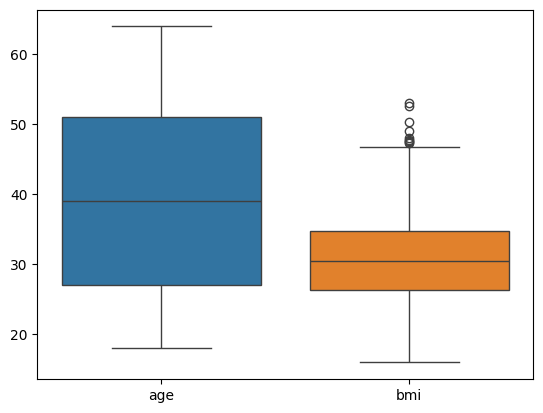

In [17]:
sns.boxplot([data['age'], data['bmi']])
plt.show()

There are no outliers in the age but there are outliers in the bmi.

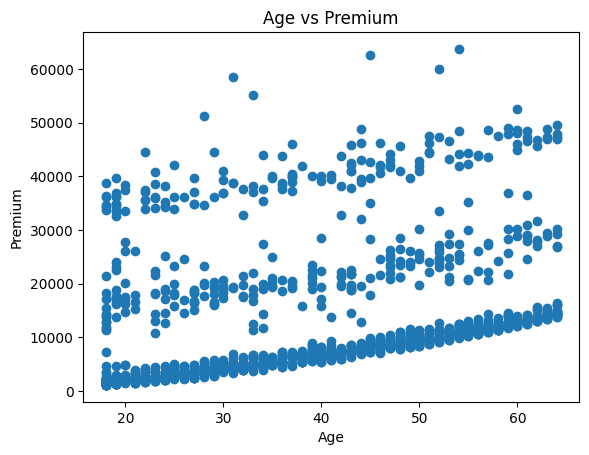

In [18]:
plt.scatter(data['age'], data['charges'])
plt.xlabel("Age")
plt.ylabel("Premium")
plt.title("Age vs Premium")
plt.show()

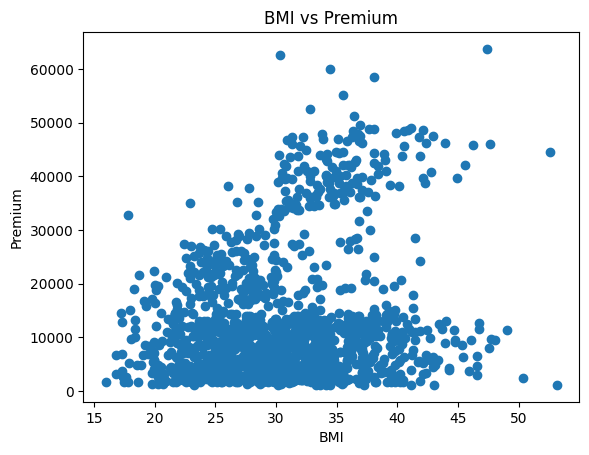

In [19]:
plt.scatter(data['bmi'], data['charges'])
plt.xlabel("BMI")
plt.ylabel("Premium")
plt.title("BMI vs Premium")
plt.show()

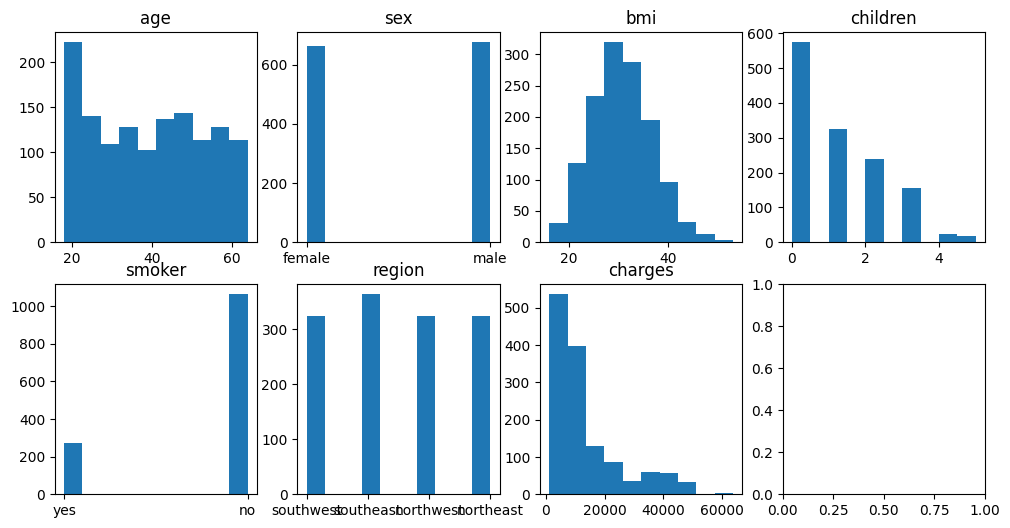

In [20]:

ncols = 4
nrows = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6))
axes = axes.flatten()
for i, column in enumerate(data.columns):

  axes[i].hist(data[column])
  axes[i].set_title(column)

plt.show()



The plots show that the data of age having peak in the beginning have uniform distribution afterwards. Bmi also have almost normal distribution. But charges which is also our target variable is right skewed. It may be normalized to get more accurate results. Other are the categorical variables where not much abnormality is found.

In [21]:
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})
data['region'] = data['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [23]:
data.dtypes

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

Now all the values are numeric.

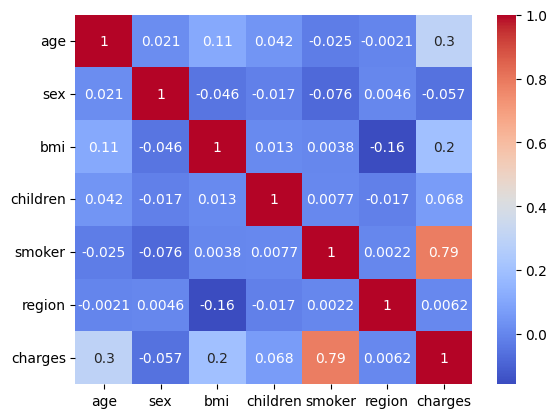

In [24]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

This shows that our target variable is very positively related with smoker while it is slightly negatively related with gender meaning that females have slightly lower trend of buying the premium than the male.

In [25]:
X = data.drop('charges', axis=1)
y= data.charges
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


In [26]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Splitting of the data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model fitting and Evaluation

In [28]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_predicted = LR_model.predict(X_test)
y_predicted

array([-2.38540155e+03,  3.01878019e+04,  2.76892538e+04,  1.65270392e+04,
        1.12877934e+04,  1.05084028e+04,  9.71806407e+03,  3.73993166e+03,
        6.92559621e+03,  1.24030829e+04,  1.92662559e+04,  1.35950200e+04,
        1.27956948e+04,  4.30341699e+03,  3.37883286e+04,  1.27386674e+04,
        7.59832258e+03,  3.70730204e+03,  1.22330592e+04,  3.33899813e+04,
        4.84094957e+03,  1.67257729e+04,  1.08418714e+03,  6.49684376e+03,
        7.86552532e+03,  3.82858168e+03,  2.93493648e+03,  7.41059906e+03,
        2.53624811e+04,  6.94687990e+03,  1.56399083e+04,  1.15670210e+04,
        3.06778151e+03,  1.34817952e+04,  3.56319243e+04,  3.36598260e+03,
        5.14331202e+03,  1.09919783e+04,  1.09210670e+04,  1.39078177e+04,
        9.39417865e+03,  3.49156523e+04,  7.81009743e+03,  3.25947417e+04,
        2.65259590e+04,  3.26404340e+04,  3.83262826e+04,  1.10458426e+04,
        1.63970277e+03,  3.06121967e+04,  7.69790953e+03,  4.64582466e+03,
        1.89721534e+03,  

In [31]:
print(f"Coefficients: {LR_model.coef_}")
print(f"Intercept: {LR_model.intercept_}")

Coefficients: [2.52569685e+02 7.22638981e-02 3.51601655e+02 4.81269828e+02
 2.38542959e+04 5.52353230e+02]
Intercept: -13724.088618041584


In [33]:
LR_model.score(X_test, y_test)

0.7362491311606674

In [47]:
def evaluate_and_plot(y_test, y_predicted):
  r2_sc = r2_score(y_test, y_predicted)
  mse = mean_squared_error(y_test, y_predicted)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_predicted)
  print(f"R2 score: {r2_sc}")
  print(f"Mean Squared Error: {mse}")
  print(f"Root Mean Squared Error: {rmse}")
  print(f"Mean Absolute Error: {mae}")
  plt.figure()
  plt.scatter(y_test, y_predicted)
  plt.plot(y_test, y_test)
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")
  plt.title("Regression plot along with actual data")
  plt.show()

R2 score: 0.7362491311606674
Mean Squared Error: 36517320.004566506
Root Mean Squared Error: 6042.956230568488
Mean Absolute Error: 4111.037238509727


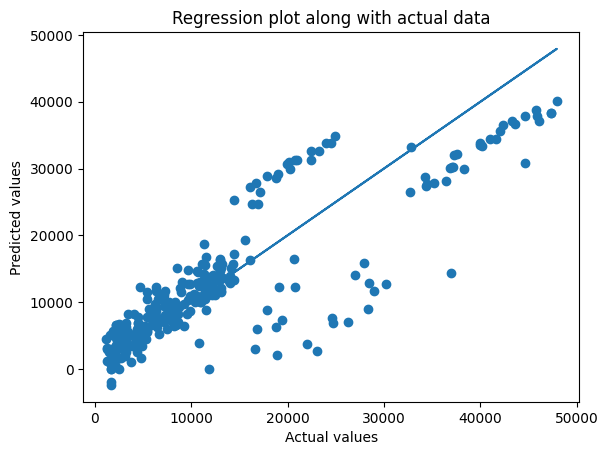

In [49]:
evaluate_and_plot(y_test, y_predicted)

# Normalizing the target variable

In [60]:
data_cp = data.copy()
from sklearn.preprocessing import StandardScaler
standardscalar = StandardScaler()
data_cp['charges'] = standardscalar.fit_transform(data_cp[['charges']])

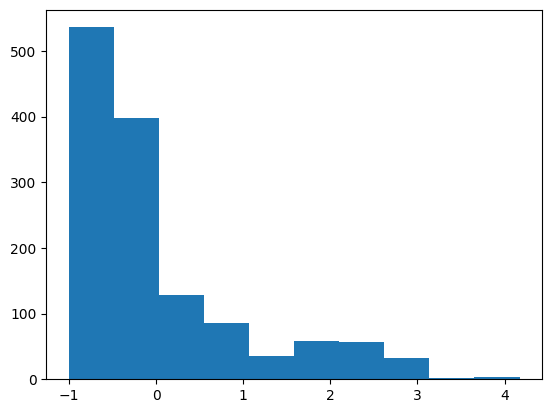

In [61]:
plt.figure()
plt.hist(data_cp['charges'])
plt.show()

In [73]:
def split_and_fit(data_cp, target):
  X_cp = data_cp.drop(target, axis=1)
  y_cp = data_cp[target]
  X_train_cp, X_test_cp, y_train_cp, y_test_cp = train_test_split(X_cp, y_cp, test_size=0.2)
  LR_model.fit(X_train_cp, y_train_cp)
  y_pred_cp = LR_model.predict(X_test_cp)
  return y_test_cp, y_pred_cp

y_test_cp,y_pred_cp = split_and_fit(data_cp, 'charges')


# Results after improving "Charges" feature

R2 score: 0.7275039425450436
Mean Squared Error: 0.2863741160604386
Root Mean Squared Error: 0.5351393426580021
Mean Absolute Error: 0.3609177033167312


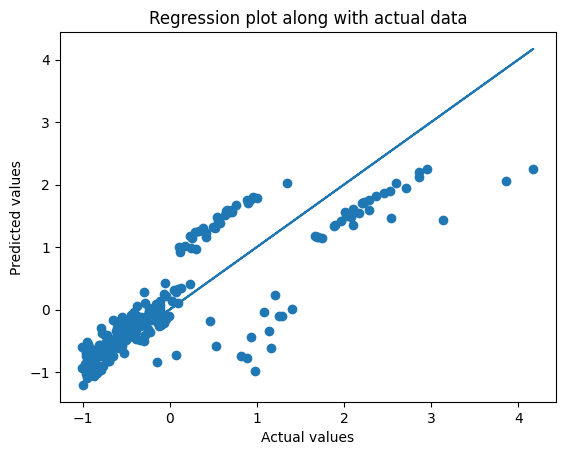

In [74]:

evaluate_and_plot(y_test_cp, y_pred_cp)

Although r2 score has reduced a little bit but mean squared error and mean absolute has reduced a lot showing improvement in model's performance.


# Normalizing the bmi feature

In [75]:


data_cp['bmi'] = standardscalar.fit_transform(data_cp[['bmi']])

In [77]:
y_test_bmi_cp, y_pred_bmi_cp = split_and_fit(data_cp, 'charges')

# Evaluating after normalizing bmi feature

R2 score: 0.772366397770468
Mean Squared Error: 0.24293078318577624
Root Mean Squared Error: 0.4928800900683413
Mean Absolute Error: 0.35120773151461837


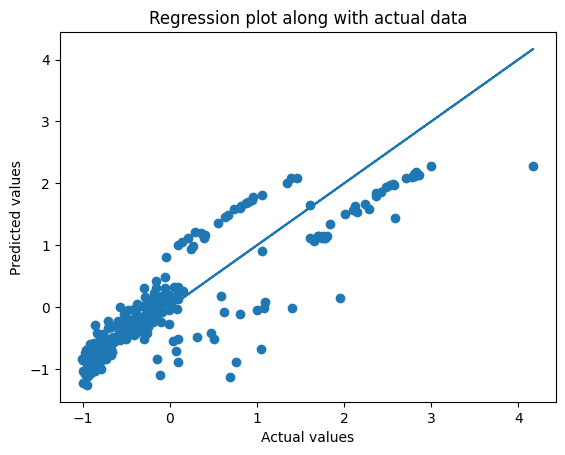

In [78]:
evaluate_and_plot(y_test_bmi_cp, y_pred_bmi_cp)

After normalizing the bmi feature the results of model improved even further.


This model can be improved further by improving other features or by hyperparameters tuning or both.